# Goal: Create the correlation and distance matrices for returns of PSE stocks over different windows

This cell is for importing necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This cell is for reading the data file.

In [2]:
PSE_data = pd.read_csv(
    "C:\\Users\\Donna\\OneDrive - ASIAN INSTITUTE OF MANAGEMENT\\(A) PAPER\\AA Code\\PSE Stocks Data\\daily.csv"
)
PSE_data['date_id'] = pd.to_datetime(PSE_data['date_id'])
PSE_data = PSE_data.set_index("date_id")
df_filtered = PSE_data.drop(columns=[col for col in PSE_data.columns if not (col.startswith('PH_') and col.endswith('_P')) and col != 'date_id'])

This code is for removing the other rows that are not within the last 10 years of the data. I also used the date September 25, 2013 as the start date so that when I calculate log returns, I will have exactly 10 years worth of data. 

In [3]:
df_filtered = df_filtered.loc['2013-09-25':'2023-09-26']

## Cleaning data
This block is for cleaning the data and removing columns with too many null values.

In [4]:
def has_high_null_percentage(column, null_threshold):
    return column.isnull().mean() > null_threshold

# def has_consecutive_constant_values(column, threshold):
#     constant_streak = column.groupby((column != column.shift()).cumsum()).transform('size')
#     return constant_streak.max() > threshold

# def has_end_constant_values(column, end_threshold):
#     end_section = column.iloc[-int(len(column) * 0.05):]
#     return end_section.nunique() == 1

# def has_few_variations(column, variation_threshold):
#     return column.nunique() < variation_threshold

null_percentage_threshold = round(df_filtered.shape[0] * 0.85)
# consecutive_constant_threshold = int(len(df_filtered) * 0.35) 
# end_constant_threshold = 0.01
# variation_threshold = 50

columns_to_drop = []

for col in df_filtered.columns:
    if col == "date_id":  
        continue
    
    if (
        has_high_null_percentage(df_filtered[col], null_percentage_threshold) # or
        # has_consecutive_constant_values(df_filtered[col], consecutive_constant_threshold) or
        # has_end_constant_values(df_filtered[col], end_constant_threshold) or
        # has_few_variations(df_filtered[col], variation_threshold)
    ):
        columns_to_drop.append(col)

df_filtered = df_filtered.drop(columns=columns_to_drop)

In [5]:
df_filtered

,PH_PIP_P,PH_ASA_P,PH_ABS_P,PH_AGN_P,PH_APC_P,PH_CHP_P,PH_CEU_P,PH_CIR_P,PH_CAA_P,PH_EEQ_P,...,PH_MJC_P,PH_PCK_P,PH_MRP_P,PH_LOT_P,PH_BAG_P,PH_H2O_P,PH_PRC_P,PH_SSN_P,PH_SIN_P,PH_SHK_P
date_id,,,,,,,,,,,,,,,,,,,,,
2013-09-25,NaN,7.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,13.0,5.0,10.0,12.0,0.0,NaN
2013-09-26,NaN,6.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,12.0,6.0,10.0,11.0,0.0,NaN
2013-09-27,NaN,6.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,13.0,5.0,10.0,11.0,0.0,NaN
2013-09-30,NaN,6.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,12.0,5.0,10.0,11.0,0.0,NaN
2013-10-01,NaN,7.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,10.0,6.0,13.0,5.0,10.0,11.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,2.0,11.0,3.0,3.0,0.0,1.0,8.0,2.0,44.0,5.0,...,1.0,4.0,7.0,4.0,5.0,1.0,7.0,2.0,1.0,9.0
2023-09-21,2.0,11.0,3.0,3.0,0.0,1.0,8.0,2.0,44.0,5.0,...,1.0,4.0,7.0,4.0,5.0,1.0,7.0,2.0,1.0,9.0
2023-09-22,2.0,11.0,3.0,3.0,0.0,1.0,8.0,2.0,44.0,5.0,...,1.0,4.0,7.0,3.0,5.0,1.0,7.0,2.0,1.0,9.0


## Calculate returns from raw prices; log returns are probably easier, but you can try others like standardized returns if you have time

This cell is for calculating log returns.

In [6]:
# PSE_log_returns = df_filtered.copy()

# for col in PSE_log_returns.columns:
#     if col == "date_id":
#         continue  # Skip non-numeric columns
    
#     for row in range(1, len(PSE_log_returns)):  # Start at row 1 to avoid division by NaN
#         if pd.isna(PSE_log_returns.iloc[row, PSE_log_returns.columns.get_loc(col)]) or \
#            pd.isna(PSE_log_returns.iloc[row - 1, PSE_log_returns.columns.get_loc(col)]):
#             continue  # Skip computation if current or previous value is NaN
        
#         PSE_log_returns.iloc[row, PSE_log_returns.columns.get_loc(col)] = \
#             np.log(PSE_log_returns.iloc[row, PSE_log_returns.columns.get_loc(col)] /
#                    PSE_log_returns.iloc[row - 1, PSE_log_returns.columns.get_loc(col)])

PSE_log_returns = df_filtered.copy()
numeric_cols = PSE_log_returns.columns.difference(["date_id"])
PSE_log_returns[numeric_cols] = PSE_log_returns[numeric_cols].replace(0, np.nan)
PSE_log_returns[numeric_cols] = np.log(PSE_log_returns[numeric_cols] / PSE_log_returns[numeric_cols].shift(1))

I removed the the row for September 25, 2013, and I filled all the nan values with zero.

In [7]:
PSE_log_returns = PSE_log_returns.loc['2013-09-26':'2023-09-26']
PSE_log_returns

,PH_PIP_P,PH_ASA_P,PH_ABS_P,PH_AGN_P,PH_APC_P,PH_CHP_P,PH_CEU_P,PH_CIR_P,PH_CAA_P,PH_EEQ_P,...,PH_MJC_P,PH_PCK_P,PH_MRP_P,PH_LOT_P,PH_BAG_P,PH_H2O_P,PH_PRC_P,PH_SSN_P,PH_SIN_P,PH_SHK_P
date_id,,,,,,,,,,,,,,,,,,,,,
2013-09-26,NaN,-0.154151,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,-0.080043,0.182322,0.0,-0.087011,NaN,NaN
2013-09-27,NaN,0.000000,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.080043,-0.182322,0.0,0.000000,NaN,NaN
2013-09-30,NaN,0.000000,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,-0.080043,0.000000,0.0,0.000000,NaN,NaN
2013-10-01,NaN,0.154151,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.09531,0.000000,0.080043,0.000000,0.0,0.000000,NaN,NaN
2013-10-02,NaN,0.000000,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,0.0,0.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
2023-09-21,0.0,0.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
2023-09-22,0.0,0.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,-0.287682,0.000000,0.000000,0.0,0.000000,0.0,0.0


## Finding an appropriate window size and creating a covariance matrix

The cell below is for creaing the correlation matrix. I used a window size of 6 months.

In [8]:
# correl_matrix = pd.DataFrame(index=PSE_log_returns.columns, columns=PSE_log_returns.columns)

# for col1 in PSE_log_returns.columns:
#     for col2 in PSE_log_returns.columns:
#         if col1 != col2:
#             # to_compare = PSE_log_returns[col2].rolling(window=180)
#             rolling_corr = PSE_log_returns[col1].rolling(window=180).corr(PSE_log_returns[col2]) # cannot use corrcoef           
#             correl_matrix.loc[col1, col2] = rolling_corr.iloc[-1]

The cell below is for creating the covariance matrix. I used a window size of 6 months.

In [9]:
# covar_matrix = pd.DataFrame(index=PSE_log_returns.columns, columns=PSE_log_returns.columns)

# for col1 in PSE_log_returns.columns:
#     for col2 in PSE_log_returns.columns:
#         if col1 != col2:
#             # to_compare = PSE_log_returns[col2].rolling(window=180)
#             rolling_cov = PSE_log_returns[col1].rolling(window=180).cov(PSE_log_returns[col2]) # cannot use corrcoef           
#             covar_matrix.loc[col1, col2] = rolling_cov.iloc[-1]

In [10]:
# covar_matrix = pd.DataFrame(
#     np.zeros((len(PSE_log_returns.columns), len(PSE_log_returns.columns))),
#     index=PSE_log_returns.columns,
#     columns=PSE_log_returns.columns,
# )

# for col1 in PSE_log_returns.columns:
#     for col2 in PSE_log_returns.columns:
#         if col1 != col2:
#             rolling_cov = PSE_log_returns[col1].rolling(window=120).cov(PSE_log_returns[col2])            
#             if not np.isnan(rolling_cov.iloc[-1]):
#                 covar_matrix.loc[col1, col2] = rolling_cov.iloc[-1]

# print(covar_matrix)

In [11]:
import pandas as pd
import numpy as np

covar_matrix = pd.DataFrame(
    0.0,
    index=PSE_log_returns.columns,
    columns=PSE_log_returns.columns,
)

window_size = 120

for stock1 in PSE_log_returns.columns:
    for stock2 in PSE_log_returns.columns:
        rolling_cov = PSE_log_returns[stock1].rolling(window=window_size).cov(PSE_log_returns[stock2])
        overall_cov = rolling_cov.iloc[window_size:].mean()  # Average after the window

        calculation_date = PSE_log_returns.index[-1]  
        if calculation_date in rolling_cov.index:
            overall_cov = rolling_cov.loc[calculation_date]
        else:
            overall_cov = np.nan

        covar_matrix.loc[stock1, stock2] = overall_cov

print(covar_matrix)

          PH_PIP_P      PH_ASA_P  PH_ABS_P  PH_AGN_P  PH_APC_P  PH_CHP_P  \
PH_PIP_P  0.024225  0.000000e+00  0.000000  0.000000       NaN       0.0   
PH_ASA_P  0.000000  3.301870e-04 -0.000231  0.000006       NaN       0.0   
PH_ABS_P  0.000000 -2.305212e-04  0.004869  0.000149       NaN       0.0   
PH_AGN_P  0.000000  5.655190e-06  0.000149  0.001842       NaN       0.0   
PH_APC_P       NaN           NaN       NaN       NaN       NaN       NaN   
...            ...           ...       ...       ...       ...       ...   
PH_H2O_P       NaN           NaN       NaN       NaN       NaN       NaN   
PH_PRC_P  0.000898 -1.028861e-06  0.000445  0.000640       NaN       0.0   
PH_SSN_P  0.000000  0.000000e+00  0.000000  0.000000       NaN       0.0   
PH_SIN_P       NaN           NaN       NaN       NaN       NaN       NaN   
PH_SHK_P  0.000000 -7.861290e-07  0.000402 -0.000154       NaN       0.0   

              PH_CEU_P  PH_CIR_P  PH_CAA_P  PH_EEQ_P  ...  PH_MJC_P  PH_PCK_P  \
PH_PIP

In [12]:
covar_matrix = covar_matrix.to_numpy()
covar_matrix

array([[ 2.42245217e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,             nan,  0.00000000e+00],
       [ 0.00000000e+00,  3.30186967e-04, -2.30521213e-04, ...,
         0.00000000e+00,             nan, -7.86129013e-07],
       [ 0.00000000e+00, -2.30521213e-04,  4.86885731e-03, ...,
         0.00000000e+00,             nan,  4.02123391e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,             nan,  0.00000000e+00],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00, -7.86129013e-07,  4.02123391e-04, ...,
         0.00000000e+00,             nan,  1.23501929e-03]],
      shape=(294, 294))

# Goal: Create the Minimum Spanning Tree

The code block below is for the imports for this portion of the code.

In [13]:
import heapq

## Turn the covariance matrix into a distance matrix (see the Singapore papers, or some of the early Mantegna papers).

The blocks of code below turn the covariance matrix into a distance matrix.

In [14]:
# this code is from the mantegna paper
# distance_matrix = 1 - np.round(1 - np.square(covar_matrix), 10) 

In [15]:
# I found out you can turn a covariance into a distance matrix
# this code is from R: cov2dist(A, a = 1, inplace = FALSE)

def cov2dist(A, a=1, inplace=False):
    if not inplace:
        A = A.copy()

    A = A.astype(np.float64)
    nan_mask = np.isnan(A)
    A[nan_mask] = 0.0
    
    variances = np.diag(A)
    D = np.sqrt(np.maximum(0, abs(variances[:, None] + variances[None, :] - 2 * A)))
    D[nan_mask] = np.nan

    return D

distance_matrix = cov2dist(covar_matrix)

In [16]:
distance_matrix

array([[0.        , 0.15669942, 0.17056781, ..., 0.15564229,        nan,
        0.15956046],
       [0.15669942, 0.        , 0.07523355, ..., 0.01817105,        nan,
        0.03958255],
       [0.17056781, 0.07523355, 0.        , ..., 0.0697772 ,        nan,
        0.07279856],
       ...,
       [0.15564229, 0.01817105, 0.0697772 , ..., 0.        ,        nan,
        0.03514284],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.15956046, 0.03958255, 0.07279856, ..., 0.03514284,        nan,
        0.        ]], shape=(294, 294))

## Create the Minimum Spanning Tree. You may wish to revisit Prim’s or Kruskal’s algorithm from your data structures and algorithms class to calculate this.

I based my code from this reference:<br>
https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/<br>

I will be using Prim's algorithm.

In [17]:
def prim_mst(distance_matrix):
    n = distance_matrix.shape[0]
    visited = [False] * n
    all_mst_edges = []

    for start_node in range(n):
        if visited[start_node]:  
            continue 

        min_heap = []
        mst_edges = []
        visited[start_node] = True
        num_visited = 1

        for i in range(n):
            if i != start_node and not np.isnan(distance_matrix[start_node, i]):
                heapq.heappush(min_heap, (distance_matrix[start_node, i], start_node, i))

        while min_heap:
            weight, u, v = heapq.heappop(min_heap)

            if visited[v]:
                continue

            visited[v] = True
            num_visited += 1
            mst_edges.append((u, v, weight))

            for i in range(n):
                if not visited[i] and not np.isnan(distance_matrix[v, i]):
                    heapq.heappush(min_heap, (distance_matrix[v, i], v, i))

        if mst_edges:
            all_mst_edges.append(mst_edges)

    return all_mst_edges

all_mst_edges = prim_mst(distance_matrix)

for i, mst_edges in enumerate(all_mst_edges, 1):
    print(f"\nMST for Component {i}:")
    for u, v, weight in mst_edges:
        print(f"Edge ({u}, {v}) with weight {weight:.10f}")


MST for Component 1:
Edge (0, 107) with weight 0.1484585656
Edge (107, 5) with weight 0.0203701261
Edge (5, 13) with weight 0.0000000000
Edge (5, 15) with weight 0.0000000000
Edge (5, 21) with weight 0.0000000000
Edge (5, 22) with weight 0.0000000000
Edge (5, 29) with weight 0.0000000000
Edge (5, 32) with weight 0.0000000000
Edge (5, 33) with weight 0.0000000000
Edge (5, 36) with weight 0.0000000000
Edge (5, 38) with weight 0.0000000000
Edge (5, 40) with weight 0.0000000000
Edge (5, 43) with weight 0.0000000000
Edge (5, 46) with weight 0.0000000000
Edge (5, 48) with weight 0.0000000000
Edge (5, 49) with weight 0.0000000000
Edge (5, 52) with weight 0.0000000000
Edge (5, 56) with weight 0.0000000000
Edge (5, 57) with weight 0.0000000000
Edge (5, 58) with weight 0.0000000000
Edge (5, 61) with weight 0.0000000000
Edge (5, 71) with weight 0.0000000000
Edge (5, 74) with weight 0.0000000000
Edge (5, 75) with weight 0.0000000000
Edge (5, 76) with weight 0.0000000000
Edge (5, 77) with weight 0

In [18]:
"""
# This does not handle any disconnected MSTs.


def prim_mst(distance_matrix):
    n = distance_matrix.shape[0]
    min_heap = []
    visited = [False] * n
    mst_edges = []
    visited[0] = True
        
    for i in range(1, n):
        if not np.isnan(distance_matrix[0, i]): # to skip nan values
            heapq.heappush(min_heap, (distance_matrix[0, i], 0, i))
    
    while min_heap:
        weight, u, v = heapq.heappop(min_heap)
        
        if visited[v]:
            continue
        
        visited[v] = True
        mst_edges.append((u, v, weight))
        
        for i in range(n):
            if not visited[i] and not np.isnan(distance_matrix[v, i]): # to skip nan values
                heapq.heappush(min_heap, (distance_matrix[v, i], v, i))
    
    return mst_edges

distance_matrix = (distance_matrix + distance_matrix.T) / 2
mst_edges = prim_mst(distance_matrix)
print("Minimum Spanning Tree (MST) edges:")

for u, v, weight in mst_edges:
    print(f"Edge ({u}, {v}) with weight {weight:.6f}")
"""

'\n# This does not handle any disconnected MSTs.\n\n\ndef prim_mst(distance_matrix):\n    n = distance_matrix.shape[0]\n    min_heap = []\n    visited = [False] * n\n    mst_edges = []\n    visited[0] = True\n        \n    for i in range(1, n):\n        if not np.isnan(distance_matrix[0, i]): # to skip nan values\n            heapq.heappush(min_heap, (distance_matrix[0, i], 0, i))\n    \n    while min_heap:\n        weight, u, v = heapq.heappop(min_heap)\n        \n        if visited[v]:\n            continue\n        \n        visited[v] = True\n        mst_edges.append((u, v, weight))\n        \n        for i in range(n):\n            if not visited[i] and not np.isnan(distance_matrix[v, i]): # to skip nan values\n                heapq.heappush(min_heap, (distance_matrix[v, i], v, i))\n    \n    return mst_edges\n\ndistance_matrix = (distance_matrix + distance_matrix.T) / 2\nmst_edges = prim_mst(distance_matrix)\nprint("Minimum Spanning Tree (MST) edges:")\n\nfor u, v, weight in mst_

# Goal: just wanted to see if i could make a heatmap

In [19]:
import seaborn as sns

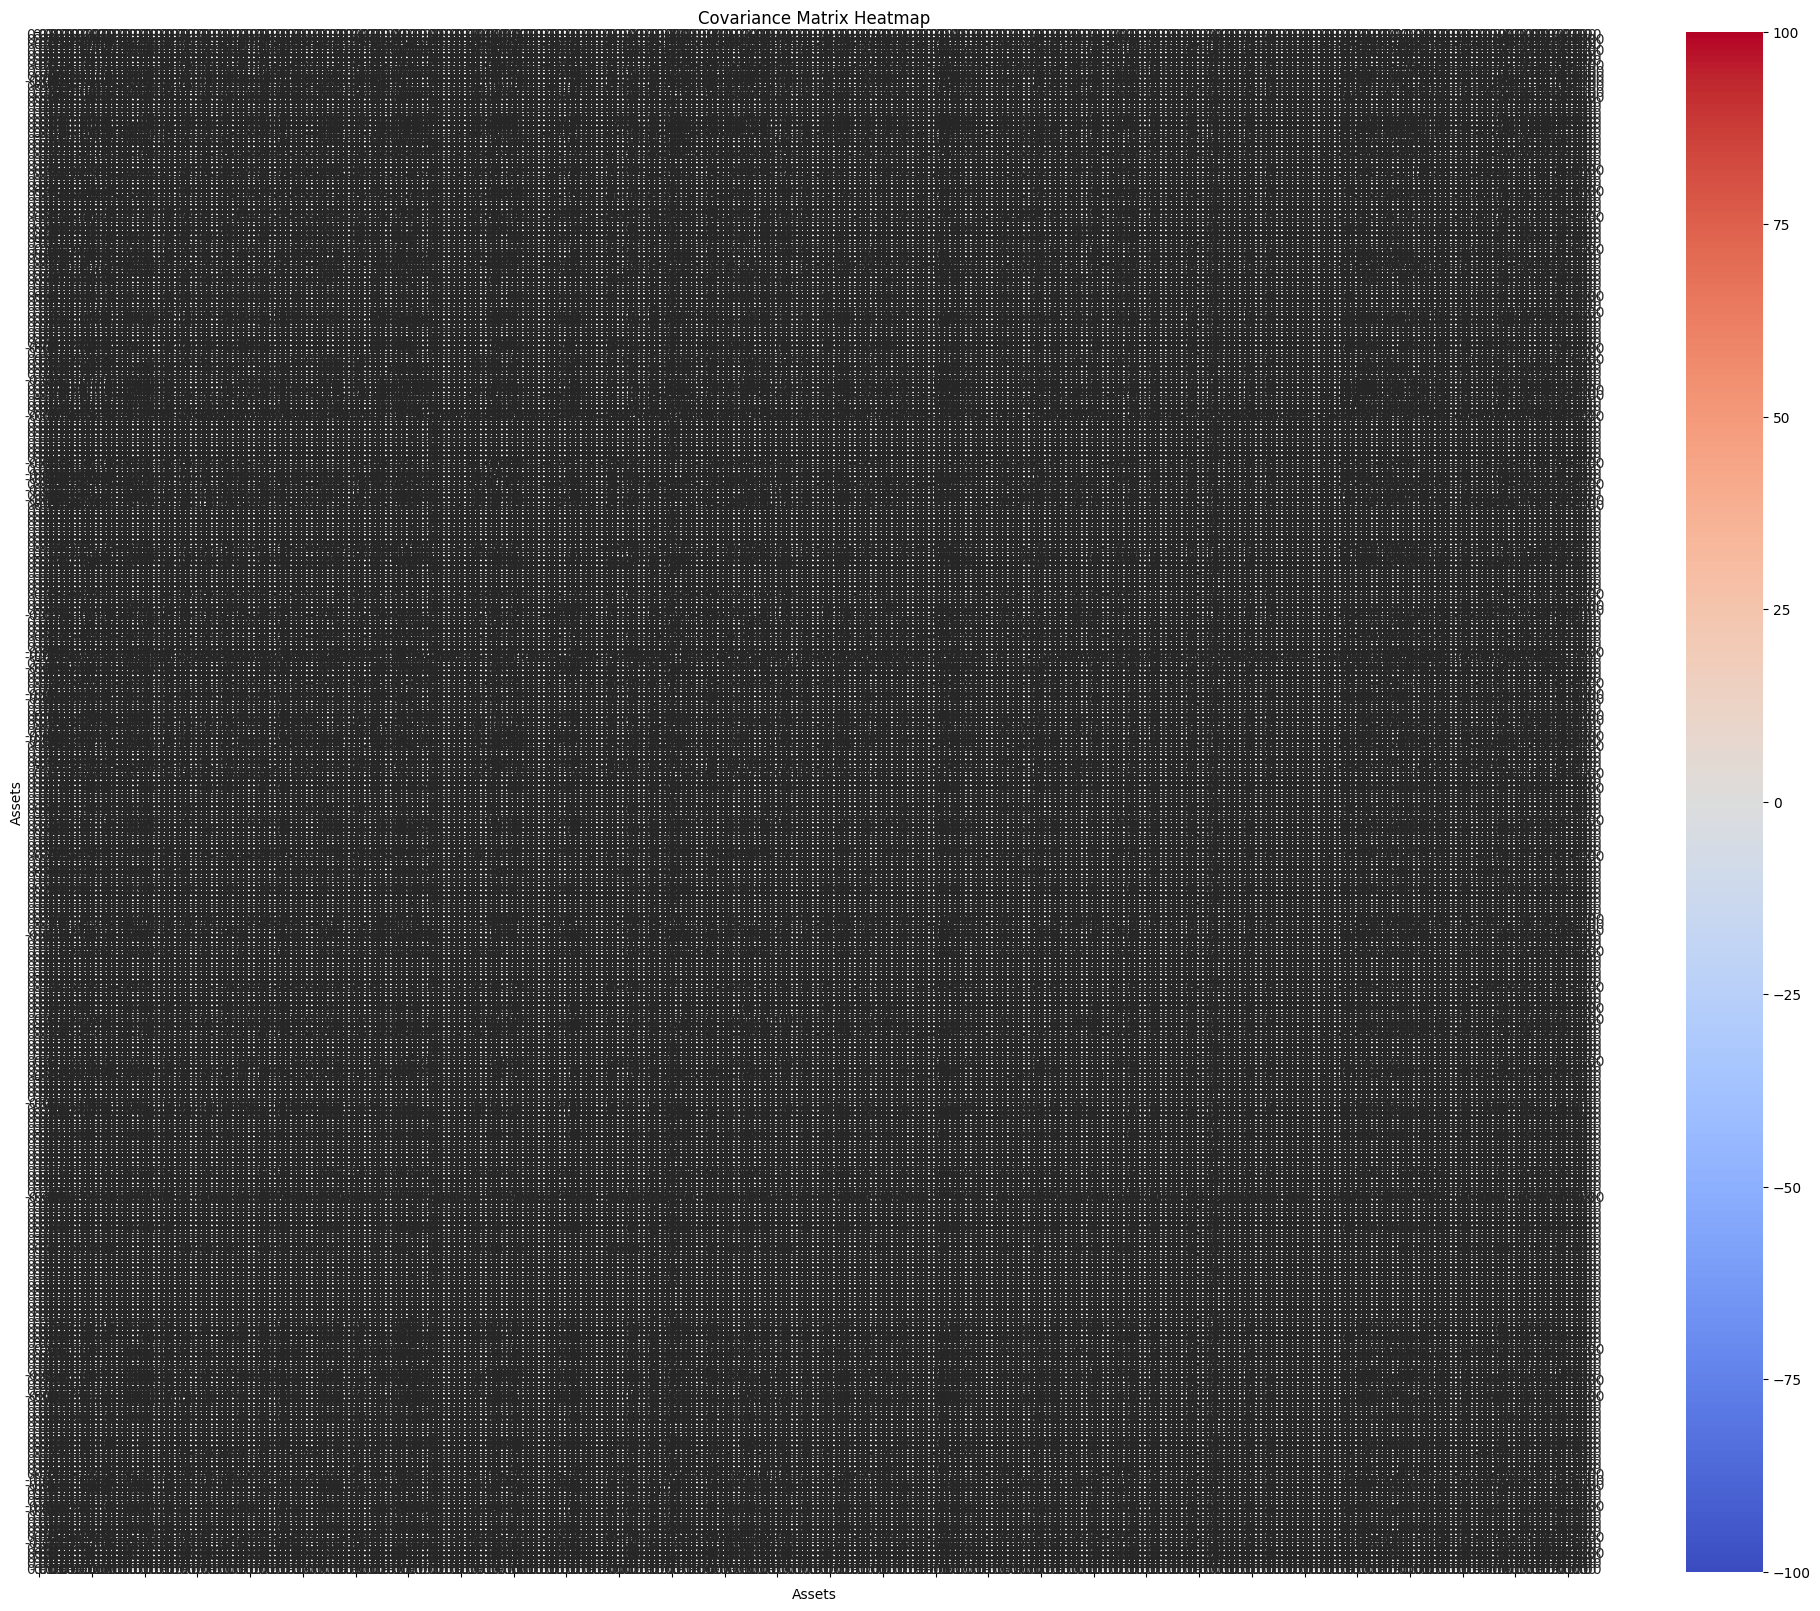

In [31]:
if isinstance(covar_matrix, np.ndarray):
    covar_matrix = pd.DataFrame(covar_matrix, index=PSE_log_returns.columns, columns=PSE_log_returns.columns)

covar_matrix.fillna(0, inplace=True)

plt.figure(figsize=(25, 20))
sns.heatmap(covar_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.005, vmin=-100, vmax=100)
plt.title("Covariance Matrix Heatmap")
plt.xlabel("Assets")
plt.ylabel("Assets")
plt.xticks(range(0, 300, 10))
plt.yticks(range(0, 300, 10))
plt.show()

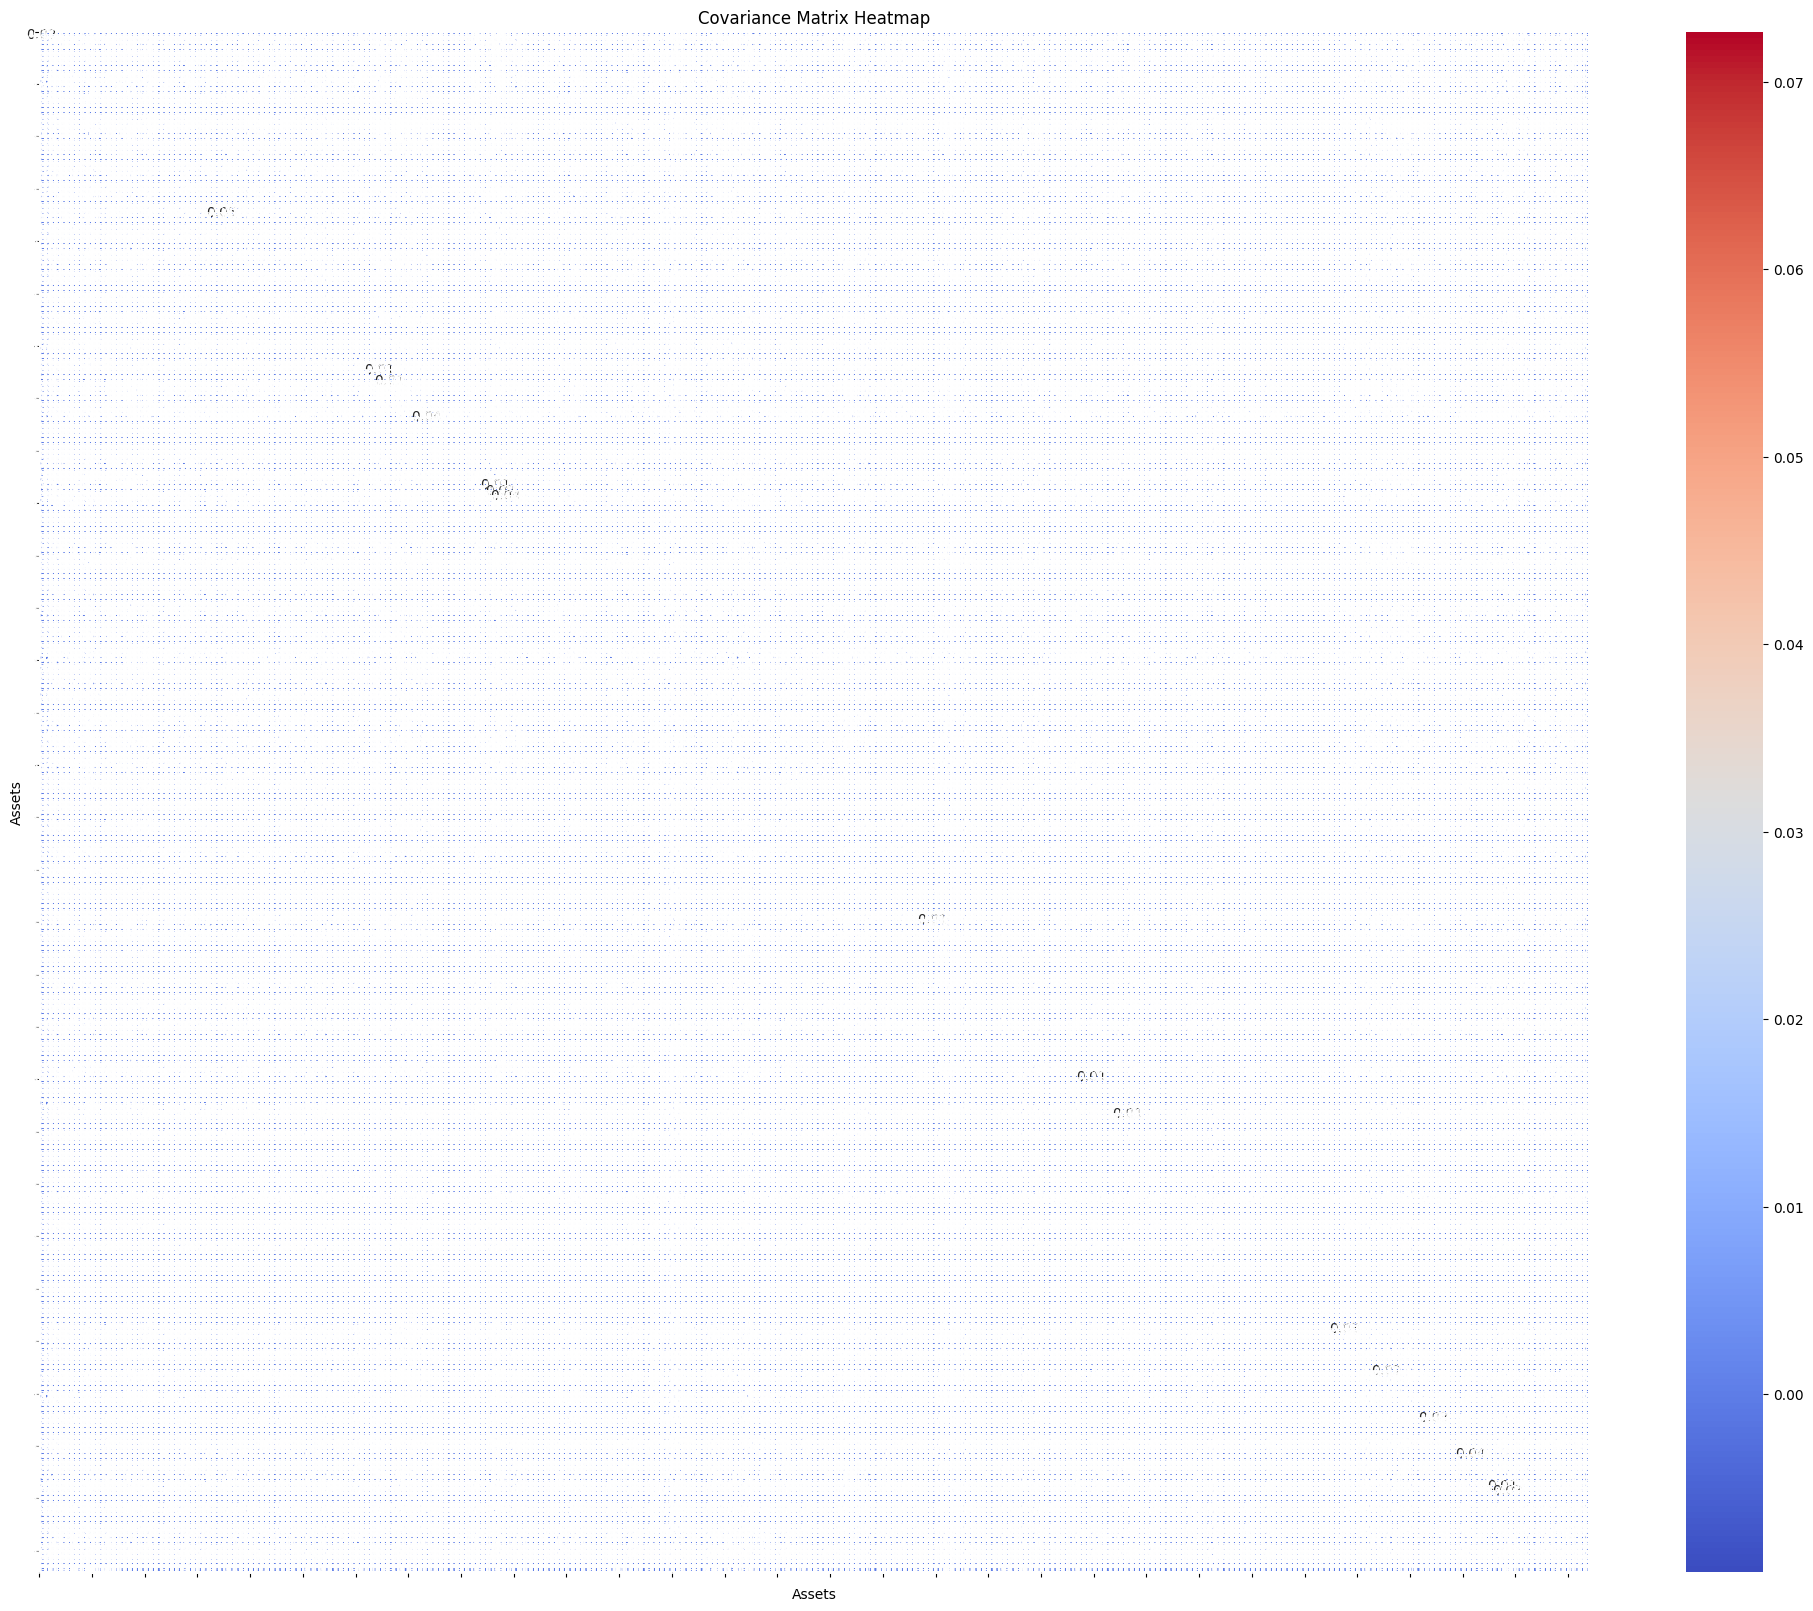

In [32]:
if isinstance(covar_matrix, np.ndarray):
    covar_matrix = pd.DataFrame(covar_matrix, index=PSE_log_returns.columns, columns=PSE_log_returns.columns)

covar_matrix.fillna(0, inplace=True)

plt.figure(figsize=(25, 20))
sns.heatmap(covar_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.005)
plt.title("Covariance Matrix Heatmap")
plt.xlabel("Assets")
plt.ylabel("Assets")
plt.xticks(range(0, 300, 10))
plt.yticks(range(0, 300, 10))
plt.show()